In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gwmat
lgw = gwmat.GWMAT()

hp_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff64cbc1e40>
hc_FD_Unlensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff64cbc3430>
hp_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7ff4ae072440>
hc_TD_Unlensed : <pycbc.types.timeseries.TimeSeries object at 0x7ff4ae070670>
hp_FD_Lensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff4ae0725f0>
hc_FD_Lensed : <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff4ae0c58d0>
hp_TD_Lensed : <pycbc.types.timeseries.TimeSeries object at 0x7ff4ae0c5c90>
hc_TD_Lensed : <pycbc.types.timeseries.TimeSeries object at 0x7ff4ae0c5ab0>


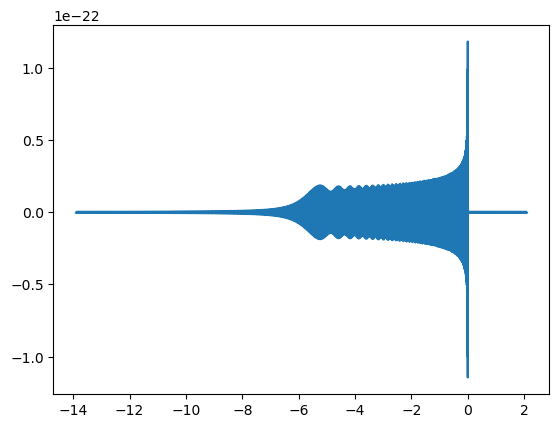

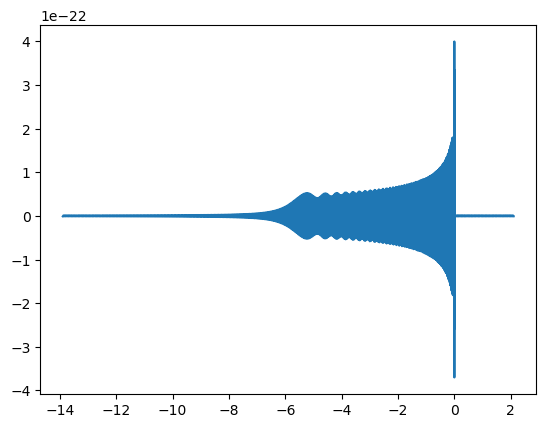

In [3]:
init_prms = dict(f_low=20., f_high=None, f_ref=20., sample_rate=2048, wf_approximant="IMRPhenomXP", ifo_list=['H1', 'L1', 'V1'] )
#psd_prms = dict(Noise=False, psd_H1='/home/sreelakshmi.m/downloads/PSD_H1_O3.txt', psd_L1='/home/sreelakshmi.m/downloads/PSD_L1_O3.txt', psd_V1='/home/sreelakshmi.m/downloads/PSD_V1_O3.txt')
lens_prms = dict(m_lens=1000, y_lens=0.1, z_lens=0)  # (m_lens=0 means unlensed)
cbc_prms = dict(mass_1=10, mass_2=10, a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0, 
                luminosity_distance=2000, ra=3.14, dec=0.785, theta_jn=0, polarization=0,
                coa_phase=0, rwrap=-2.1, trigger_time=1242529720)
prms = {**init_prms, **lens_prms, **cbc_prms}
res = lgw.injection.generate_gw_polarizations_hp_hc(**prms)
lgw.general_utils.print_dict(res)
hp= res['hp_TD_Unlensed']
plt.plot(hp.sample_times, hp)
#plt.xlim(-6,-3)
plt.show()
hp_lensed = res['hp_TD_Lensed']
plt.plot(hp_lensed.sample_times, hp_lensed)
plt.show()

required distance: 189.46071961692672
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7ff4b04bee00>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7ff4b04bef20>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aed810>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aefbb0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aeca30>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aed810>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aefbb0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0aeca30>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff4ae0f9300>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff4a0bc94e0>, 'V1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7ff4a0aeead0>}
signal_templates : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7ff4a0acee00>, 'L1': <pycbc.types.timeserie

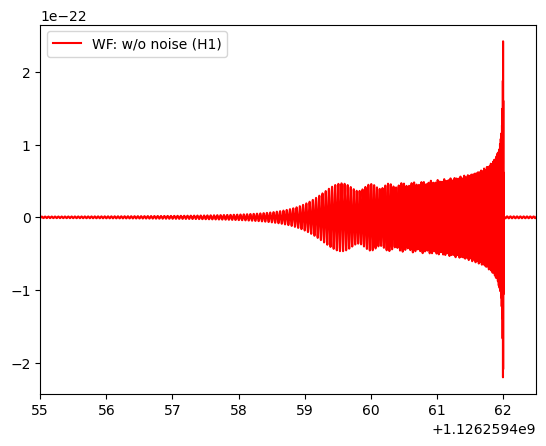

In [4]:
init_prms = dict(f_start=20., f_low= 20, f_high=None, f_ref=20., sample_rate=4096, wf_approximant="IMRPhenomXPHM", ifo_list=['H1', 'L1', 'V1'] )
psd_prms = dict(Noise=False, psd_H1='/home/sreelakshmi.m/downloads/PSD_H1_O3.txt', psd_L1='/home/sreelakshmi.m/downloads/PSD_L1_O3.txt', psd_V1='/home/sreelakshmi.m/downloads/PSD_V1_O3.txt')
lens_prms = dict(m_lens=0, y_lens=0.1, z_lens=0)  # (m_lens=0 means unlensed)
cbc_prms = dict(mass_1=15, mass_2=15, inclination= np.pi, spin1x=0,spin1y=0,spin1z=0, spin2x=0, spin2y=0, spin2z=0, 
                    luminosity_distance=None, ra=3.14, dec=0.785, polarization=0,
                    coa_phase=0, rwrap=-2.1,trigger_time= 1126259462)
    #misc_prms = dict(extra_padding_at_start=5, extra_padding_at_end=5)
prms = {**init_prms, **lens_prms, **cbc_prms, **psd_prms} #'save_data':True, 'data_label':'simulated_data', 'data_outdir':'../src/'}
    
dist = lgw.injection.network_optimal_snr_to_distance(net_optimal_snr=30, **prms)
print('required distance:', dist)
prms['luminosity_distance'] = dist
    
res = lgw.injection.simulated_injection_with_complete_data(**prms)
lgw.general_utils.print_dict(res)

    
        # findin actual trigger time at H1 (the reference detector)
signal_H1 = res['pure_ifo_signal']['H1'] 
max_index = np.argmax(np.array(signal_H1))
peak_time = np.array(signal_H1.sample_times)[max_index]
prms['trigger_time_at_H1'] = peak_time
print('trigger_time_at_H1:', peak_time)
    # injection_info[str(k)] = prms
        
plt.plot(signal_H1.sample_times, signal_H1, color='red', linestyle='solid', label='WF: w/o noise (H1)')
#plt.xlim(1126259462-10, 1126259462+0.5)
plt.xlim(1126259462-7, 1126259462+0.5)
plt.legend()
plt.show()
 